In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd

In [2]:
# Load Titanic dataset 
df = pd.read_csv('../data/Titanic_rows.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [Class, Sex, Age, Survived]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [3]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Empty DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


Survived_Yes
False    1490
True      711
Name: count, dtype: int64
Survived_Yes
False    1490
True      711
Name: count, dtype: int64
Survived_Yes
False    67.696502
True     32.303498
Name: count, dtype: float64


,Class_2nd,Class_3rd,Class_Crew,Sex_Male,Age_Child,Survived_Yes
0,False,True,False,True,True,False
1,False,True,False,True,True,False
2,False,True,False,True,True,False
3,False,True,False,True,True,False
4,False,True,False,True,True,False


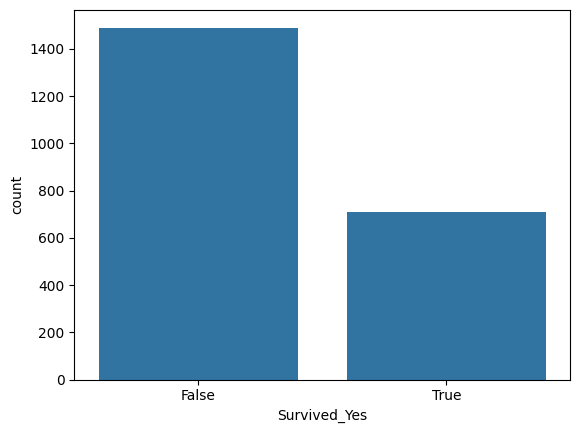

In [4]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['Survived_Yes'].value_counts())
print(df_obj['Survived_Yes'].value_counts())
print( (df_obj['Survived_Yes'].value_counts()/ df_obj['Survived_Yes'].value_counts().sum()) * 100)
sns.countplot(data=df_obj, x='Survived_Yes')
df_obj.head()

In [5]:
attr = df_obj.drop('Survived_Yes', axis=1)
target = df_obj['Survived_Yes']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.2, random_state=77)

In [ ]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=77)
# model = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=7)


In [7]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
 

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.8027210884353742
[[319   4]
 [ 83  35]]
              precision    recall  f1-score   support

       False       0.79      0.99      0.88       323
        True       0.90      0.30      0.45       118

    accuracy                           0.80       441
   macro avg       0.85      0.64      0.66       441
weighted avg       0.82      0.80      0.76       441



In [9]:

# Feature importance for Mean Decrease Accuracy
feature_importance = model.feature_importances_
# # Feature importance for Mean Decrease GINI or any impuritiy
 
print(f"feature importance: {feature_importance}" )



feature importance: [0.05210917 0.17918005 0.05270283 0.64935861 0.06664934]


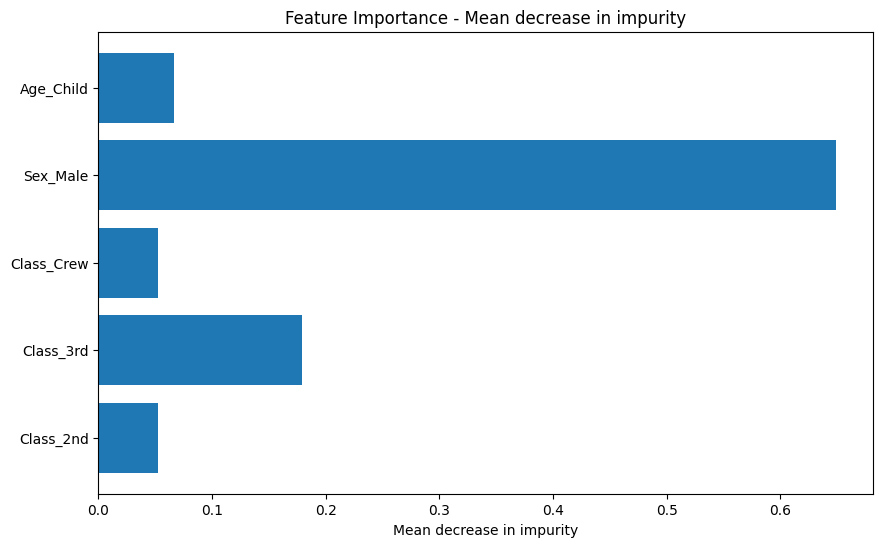

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), attr.columns)
plt.xlabel('Mean decrease in impurity')
plt.title('Feature Importance - Mean decrease in impurity')
plt.show()

In [12]:
# Calculate initial accuracy
initial_accuracy = accuracy_score(target_test,target_pred)
print(initial_accuracy)

0.8027210884353742


Class_2nd  reduction in accuracy 0.0022675736961451642
Class_3rd  reduction in accuracy 0.020408163265306145
Class_Crew  reduction in accuracy 0.0113378684807256
Sex_Male  reduction in accuracy 0.108843537414966
Age_Child  reduction in accuracy 0.020408163265306145


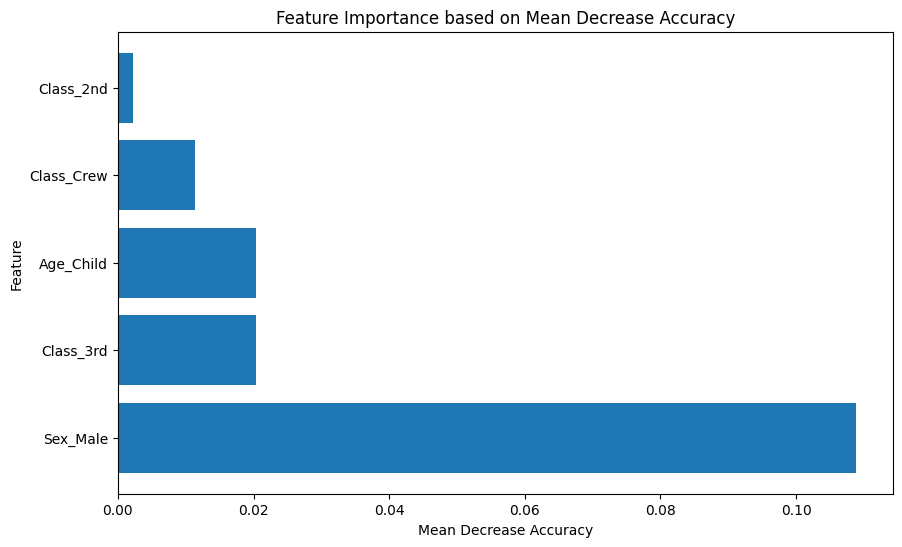

      Feature  Importance
3    Sex_Male    0.108844
1   Class_3rd    0.020408
4   Age_Child    0.020408
2  Class_Crew    0.011338
0   Class_2nd    0.002268


In [13]:
feature_importances = []

# Calculate Mean Decrease Accuracy for each feature

for i in range(attr_test.shape[1]):
    attr_test_permuted = attr_test.copy()
    np.random.shuffle(attr_test_permuted.iloc[:, i].values)
    permuted_accuracy = accuracy_score(target_test, model.predict(attr_test_permuted))
    feature_importances.append(initial_accuracy - permuted_accuracy)
    print( attr_test_permuted.columns[i],f" reduction in accuracy {initial_accuracy - permuted_accuracy}")

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': attr.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Mean Decrease Accuracy')
plt.ylabel('Feature')
plt.title('Feature Importance based on Mean Decrease Accuracy')
plt.show()

print(feature_importance_df)

In [14]:
single_tree = model.estimators_[1]
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(single_tree,fontsize=20,filled=True,feature_names=attr.columns);